## Data Science Challenge: House Prices - Advanced Regression Techniques

### Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
%matplotlib inline
sns.set_style('whitegrid')

### Set path to data folder

In [13]:
data_path = '/Users/administrador/Documents/Pessoal/repositorios/data_science_challenges/data/'

### Import data

In [14]:
df_train = pd.read_csv(data_path + '/train.csv')

### Basic information about the data

The database has an ID column named ID. It can be totally removed as it has no importance for modelling the value of each house.

In [62]:
df_train = df_train.iloc[:,1:].copy()

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Numeric Variables

In [57]:
df_train.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [60]:
df_train.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

Categorical Data that are not object type:


In [64]:
# Cate
df_train['MSSubClass'].astype('category').info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSSubClass
Non-Null Count  Dtype   
--------------  -----   
1460 non-null   category
dtypes: category(1)
memory usage: 2.2 KB


Number of rows and columns

In [42]:
n_rows, n_col = df_train.shape
print("Number of rows and columns:", n_rows, ",", n_col)

Number of rows and columns: 1460 , 81


In [50]:
null_cols = df_train.isnull().sum() 
null_cols = null_cols[null_cols>0]
prct_cols = null_cols/n_rows
#df_null[df_null > 0].sort_values(ascending=False)
df_null = pd.DataFrame({"n_nulls":null_cols, "% nulls": round(prct_cols*100,2)})
df_null.sort_values(by="n_nulls", ascending=False)

,n_nulls,% nulls
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


Columns to be deleted

In [54]:
df_null[df_null['% nulls'] >= 10].sort_values(by='n_nulls',ascending=False)

,n_nulls,% nulls
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74


Columns to remove rows with null

In [55]:
df_null[df_null['% nulls'] < 10].sort_values(by='n_nulls',ascending=False)

,n_nulls,% nulls
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtExposure,38,2.60
BsmtFinType2,38,2.60
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtFinType1,37,2.53


<Axes: xlabel='SalePrice', ylabel='Count'>

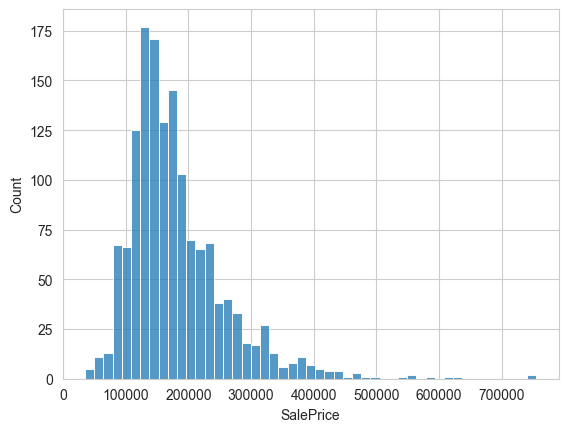

In [29]:
sns.histplot(df_train, x= 'SalePrice')